# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.



<div style="border-left: 4px solid #d9534f; padding: 0.8em; background-color: #fbeaea; margin-bottom: 1em;">
  <strong>⚠️ Warning:</strong> <br><br>It is of utmost importance that you clearly understand the tennis environment you deal with. Here is an introduction to set you up. (I was really confused in the beginning...)
</div>

---

## 🎾 What Kind of Environment Is Unity Tennis?

Unity’s **Tennis environment**, as provided in ML-Agents, is a **two-agent, competitive environment** — but it’s also:

* **Zero-sum**: one agent’s success is the other’s failure
* Designed to **learn adversarial strategies** (i.e., win against opponent)

However, **the way it’s trained here** is different:

---

### 💡 Two Possible Training Objectives

| Objective          | Description                        | Common in                     | Reward Style                 |
| ------------------ | ---------------------------------- | ----------------------------- | ---------------------------- |
| 🥊 **Competitive** | Agent A tries to beat Agent B      | Self-play, real tennis, games | Win: +1, Lose: -1            |
| 🏓 **Cooperative** | Agents try to keep the rally going | Skill learning, paddle-ball   | Each successful bounce: +0.1 |

---

### ✅ What Does Unity Tennis Actually Do?

In our **Tennis environment**:

* **Each agent gets +0.1** for a successful hit / rally
* **No negative reward** for failing or beating the opponent
* The environment resets **when the ball is lost by either agent**
* So both agents benefit from **keeping the ball in play longer**

➡️ **It’s a reward-sharing, cooperative task disguised as tennis.**

---

### 🔁 So what’s the true training goal?

> Train **both agents** to collaboratively **maximize the number of time steps the ball stays in play**.

#### Reward Function (per agent):

$$
r_i = 
\begin{cases}
+0.1 & \text{if the rally continues successfully} \\
-0.01 & \text{otherwise}
\end{cases}
$$

#### Goal:

$$
\max \sum_t r_1^t + r_2^t
$$

→ Maximize **joint cumulative reward** by **collaborative coordination**, not winning.

---

## 🤯 Why the Confusion?

* The **name "Tennis"** suggests competition.
* It's a **2-agent setup**, which is typical of adversarial games.
* But the **reward structure promotes cooperation** — it’s a **coordination task**, not a match.

In reinforcement learning, the **reward function defines the goal**, not the scenario. That’s why you are 100% right to question it.

---

### 🧠 How should this affect your implementation?

1. **Treat it as a cooperative game** during training:

   * It’s okay for both agents to **share parameters** or use similar actor structures.
   * Prioritize **stability and coordination**, not competition.

2. **Measure performance** by:

   * Steps per episode
   * Total reward per episode (both agents combined)
   * Length of rally

3. **Optional**: Of course it is possible to **modify** the environment later to make it truly adversarial by adjusting rewards (e.g., +1 for winner, -1 for loser).

---

### 🧠 Mental Model

> Imagine it as a paddle game: **keep the ball alive**.
> It’s not tennis, it’s a **longest-rally challenge**.
> You are teaching agents not to win — but **not to lose**.

---


### A more detailed Explanation to cement your Intuition

Let’s break it down:

| Event                                | Reward | Who gets it     | Goal/Interpretation            |
| ------------------------------------ | ------ | --------------- | ------------------------------ |
| Agent hits the ball over net         | +0.1   | That agent only | Encourages **successful play** |
| Agent lets the ball drop or hits out | -0.01  | That agent only | Penalizes **ending the rally** |

#### 🔁 No win/lose dynamics:

* **Each agent is rewarded or penalized based on its own behavior.**
* There is **no opponent-based scoring** (e.g., Agent A +1 if Agent B fails — this would be zero-sum).
* The **rewards are not coupled** — one agent can do well while the other performs poorly or even fails.

---

### 🤝 So What Is It?

#### ✅ It is a **cooperative**, **partially observable**, **continuous-control** multi-agent environment.

* Agents share the **mutual incentive** to **keep the ball in play**.
* They are not punished or rewarded based on each other’s success or failure.
* **Maximizing episode length (rally)** is the emergent goal.

---

### 🧠 Summary

| Feature                 | True for Unity Tennis |
| ----------------------- | --------------------- |
| Multi-Agent?            | ✅ Yes                 |
| Continuous control?     | ✅ Yes                 |
| Partially observable?   | ✅ Yes (local obs)     |
| Competitive (zero-sum)? | ❌ **No**              |
| Cooperative dynamics?   | ✅ Yes                 |
| Coordination required?  | ✅ Yes                 |

---

## 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# Watch for changes
%load_ext autoreload
%autoreload 2

from unityagents import UnityEnvironment
import numpy as np

# Monkey patch missing attributes for newer numpy versions
if not hasattr(np, "float_"):
    np.float_ = np.float64
    
if not hasattr(np, "int_"):
    np.int_ = np.int64

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

Found path: /home/oliver/project-showroom/projects/reinforcement-learning/collab-and-compet/Tennis_Linux/Tennis.x86_64
Mono path[0] = '/home/oliver/project-showroom/projects/reinforcement-learning/collab-and-compet/Tennis_Linux/Tennis_Data/Managed'
Mono config path = '/home/oliver/project-showroom/projects/reinforcement-learning/collab-and-compet/Tennis_Linux/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
	ScreenSelector.so
Logging to /home/oliver/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


<details>
<summary>
Whait! What? The Udacity docs are saying something about 8 observations per step, why do we get here 24 observations per agent and per step?</summary>

Excellent question — the short answer is:

> **Unity returns 24 elements (3 × 8)** because **observation stacking is a built-in feature** of the ML-Agents engine — and it's enabled by default in the environment configuration.

This behavior is **intentional**, not arbitrary. Here's why:

---

### 🧠 Why Unity (ML-Agents) Stacks Observations by Default

#### 1. **Frame stacking provides temporal context**

In environments like Tennis:

* The agent gets **positions and velocities**, but not all dynamics are obvious from a single frame.
* Without stacking, the agent might struggle to infer:

  * Ball trajectory
  * Paddle motion direction
  * Speed changes over time

With stacked frames:

* Even a feedforward (non-recurrent) network gets **short-term memory** baked into the input.

This is especially important for:

* **Fast-moving objects** (like a bouncing ball)
* **Sparse reward signals**
* Agents with **no internal memory** (i.e., no RNN or GRU)

---

#### 2. **Stacking is configurable in the Unity Editor**

The ML-Agent training config for the Tennis environment likely contains:

```yaml
vector_observation_stacks: 3
```

So instead of returning:

```python
obs_t = [paddle_pos_t, ball_pos_t, paddle_vel_t, ...]  # 8 values
```

Unity returns:

```python
obs_t = [obs_{t-2}, obs_{t-1}, obs_t]  # 3 × 8 = 24 values
```

---

### 🧩 Why Not Just Return 8?

They *could* — and in fact, you **can change this** by modifying the Unity environment YAML config and recompiling the binary. But that would:

* Require you to **manually add recurrence or past frames** to your model
* Reduce **generalization and stability**, especially in fast games

So Unity makes a tradeoff:
✅ Slightly larger obs
✅ Better learning without extra effort
❌ You need to know that it’s happening 😉

---

### ✅ Summary

| Question                      | Answer                                                       |
| ----------------------------- | ------------------------------------------------------------ |
| Why 24 elements instead of 8? | Because Unity stacks 3 × 8 obs frames for temporal context   |
| Does env step = 3 steps?      | ❌ No — stacking is in observation, not simulation timestep   |
| Can I change it?              | ✅ Yes — via Unity ML config (`vector_observation_stacks: 1`) |

</details>

## 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    episode_scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    count_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        episode_scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step

        count_steps += 1
        if np.all(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(episode_scores)))
    print('Number of steps in episode {}: {}'.format(i, count_steps))

Score (max over agents) from episode 1: 0.0
Number of steps in episode 1: 15
Score (max over agents) from episode 2: 0.0
Number of steps in episode 2: 13
Score (max over agents) from episode 3: 0.0
Number of steps in episode 3: 15
Score (max over agents) from episode 4: 0.0
Number of steps in episode 4: 14
Score (max over agents) from episode 5: 0.09000000171363354
Number of steps in episode 5: 31


When finished, you can close the environment.

In [6]:
env.close()

## 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## 5. Creating the Experience Buffer (Replay)

In [ ]:
import torch
from codebase.experience.replay import MultiAgentReplayBuffer

buffer = MultiAgentReplayBuffer(
    num_agents=2,
    obs_size=24,           # e.g., 24-dim observation vector per agent
    action_size=2,         # e.g., 2 continuous actions per agent
    buffer_size=100000,
    batch_size=4,
    seed=42,
    device=torch.device("cuda") if torch.cuda.is_available() else "cpu"
)

import numpy as np

# One time step, 2 agents
states = [np.random.rand(24), np.random.rand(24)]       # List of 2 arrays, shape (24,)
actions = [np.random.rand(2), np.random.rand(2)]         # List of 2 arrays, shape (2,)
rewards = [0.5, -0.5]                                    # One reward per agent
next_states = [np.random.rand(24), np.random.rand(24)]
dones = [False, False]

buffer.add(states, actions, rewards, next_states, dones)

# Add more samples to exceed batch size
for _ in range(10):
    buffer.add(
        [np.random.rand(24), np.random.rand(24)],               # states (8 variables x 3 dimensions)
        [np.random.rand(2), np.random.rand(2)],                 # actions (2 actions per agent)
        [np.random.uniform(-1, 1), np.random.uniform(-1, 1)],   # rewards
        [np.random.rand(24), np.random.rand(24)],               # next_states
    [False, False]                                              # dones
    )

# Sample a batch
states, actions, rewards, next_states, dones = buffer.sample()

print("states.shape:      ", states.shape)       # (batch_size, 2, 24)
print("actions.shape:     ", actions.shape)      # (batch_size, 2, 2)
print("rewards.shape:     ", rewards.shape)      # (batch_size, 2)
print("next_states.shape: ", next_states.shape)  # (batch_size, 2, 24)
print("dones.shape:       ", dones.shape)        # (batch_size, 2)

states.shape:       torch.Size([4, 2, 24])
actions.shape:      torch.Size([4, 2, 2])
rewards.shape:      torch.Size([4, 2])
next_states.shape:  torch.Size([4, 2, 24])
dones.shape:        torch.Size([4, 2])


### 🧠 Do we need a thread safe replay buffer?

> **In our setup (Unity Tennis with 2 agents and a single-threaded trainer loop), the replay buffer does *not* need to be thread-safe.**
> But if we later move to **parallel environments** or **asynchronous agents**, then **yes**, we’ll need to make the buffer thread-safe.

---

## 🧩 Why It's Fine *Now*

In the typical **Unity Tennis + MADDPG** training loop:

* We step the environment **synchronously**: both agents act, and we get the joint experience in one call.
* Then we **call `.add(...)` once** per step with this joint experience.
* Similarly, `.sample()` is called only when we're ready to learn — also inside a controlled loop.

So:

* All buffer interactions happen in the same thread → **no race conditions**.
* No async samplers or environment workers (unlike setups like `Ray RLlib` or `SEED RL`).

---

## ✅ When We *Do* Need Thread-Safety

If we later extend your system to:

* **Use multiple environments** (e.g. Unity envs in parallel workers)
* **Have multiple trainers/workers pushing to the same buffer**
* **Sample while adding (e.g. for prioritized replay with async training)**

Then we'll need to:

* Wrap the buffer with **a lock (e.g., `threading.Lock` in Python)**
* Or use **concurrent queues** (e.g., `queue.Queue` or `multiprocessing.Queue`)
* Or better: move to a framework like **ReplayBuffer from RLlib or TorchRL** if going big.

---

## 6. The Actor-Critic Models

### 🎾 Unity Tennis Environment Specs

Each **agent** observes:

* **State vector**: 24 floats
  Each **agent** outputs:
* **Action vector**: 2 floats (continuous control)

In **MADDPG**, each agent has:

* One **actor**: maps its own observation to action
* One **critic**: maps **joint observations + joint actions** to Q-value

So for two 2 agents:

* Actor input: `obs_dim = 24`, output: `action_dim = 2`
* Critic input: `2 * obs_dim + 2 * action_dim = 2 * (24 + 2) = 52`

**Attention**: The Critic input is shared for both agents, thus the multiplication by factor 2!

---

### 🧠 Design Choices

| Component                | Details                              |
| ------------------------ | ------------------------------------ |
| Hidden sizes             | \[128, 128]                          |
| Activations              | ReLU (Actor uses `tanh` at output)   |
| Layer norm or batch norm | Optional, not included yet           |
| Weight init              | Small uniform for actor output layer |

---

In [ ]:
from codebase.maddpg.net.actor_critic import Actor, Critic

actor = Actor(obs_size=24, action_size=2)
critic = Critic(full_obs_size=2*24, full_action_size=2*2)

obs_batch = torch.rand(10, 24)
action_batch = actor(obs_batch)

obs_all = torch.rand(10, 48)
action_all = torch.rand(10, 4)
q_value = critic(obs_all, action_all)

<details>
<summary>CTDE - Centralized Training with Decentralized Execution</summary>

> 💥 **How can agents learn cooperatively or competitively in a non-stationary multi-agent world, yet still act independently at test time?**

---

### 🧠 Problem in Multi-Agent RL

In multi-agent reinforcement learning (MARL), each agent learns a policy in an environment where other agents are also learning. This makes the environment:

* **Non-stationary** from each agent’s perspective
* Hard for **value functions** (like Q-functions) to converge
* Especially unstable if agents rely only on their **local** observations

So we want:

* Stability during training ✅
* Independence at runtime ✅

---

### 💡 Solution: Centralized Training, Decentralized Execution (CTDE)

#### 🔧 During training:

Each agent can access:

* **Global state** (i.e., observations of all agents)
* **Actions of all agents**
* **Shared or opponent policies** (useful for computing target actions)
* **Joint reward structure**

This allows **centralized critics** to be trained:

$$
Q_i(o_1, o_2, \dots, a_1, a_2, \dots)
$$

Each agent's **critic** can see the whole world.

---

#### 🧃 During execution (deployment):

Each agent acts **independently** using:

* Only **its own local observation**
* Its **actor**: $a_i = \mu_{\theta_i}(o_i)$

No centralized info is needed. This makes the policy:

* Portable ✅
* Realistic ✅
* Scalable ✅

---

### 📊 Example in MADDPG (Paper: Lowe et al., 2017)

| Phase         | Actor Input     | Critic Input                              |
| ------------- | --------------- | ----------------------------------------- |
| **Training**  | Local obs $o_i$ | Global obs $o_1, o_2$, actions $a_1, a_2$ |
| **Execution** | Local obs $o_i$ | ❌ No critic, only actor used              |

So in code:

```python
# Actor uses only its own obs (decentralized)
action = self.actor(obs_i)

# Critic sees everything (centralized)
q_value = self.critic(obs_1, obs_2, action_1, action_2)
```

---

### 🎯 Why It Works

* Agents **can exploit additional info** to learn stable value estimates.
* But they **don't need that info at test time** — they learned how to act well using just local inputs.

This removes the chicken-and-egg problem of co-learning agents constantly shifting each other’s dynamics during training.

---

### 📦 Broader Use of CTDE

This principle is used in many algorithms:

* **MADDPG**: centralized critics, decentralized actors
* **QMIX**: centralized mixing network, decentralized policies
* **COMA**, **HAPPO**, **MAPPO**, etc.

And even in real-world robotics, swarm coordination, autonomous driving, etc., where agents are trained in simulation with more info than they'll have at runtime.

---

### 🧠 Intuition Summary

> *"During training, let the agents be as smart and informed as they want. But when it’s time to deploy, they have to go solo."*

This is **CTDE** in a nutshell — a practical tradeoff between **stability** and **realism**.

</details>

## 7. The DDPGAgent

### 🧠 Purpose:

This class defines the learning logic for a **single agent** using the **DDPG (Deep Deterministic Policy Gradient)** algorithm.

### 🧱 Architecture:

* **Actor**: Neural network mapping from local observation → continuous action
* **Critic**: Neural network estimating Q-values using **global** (joint) state and **joint** actions
* **Target Networks**: Smoothed copies of actor and critic to stabilize learning (soft updates)
* **Exploration**: Adds **Ornstein-Uhlenbeck (OU)** noise to promote correlated continuous exploration

### 🔁 Algorithm (for one agent):

1. **Action Selection**:

   $$
   a_t = \mu(o_t) + \text{OU noise}
   $$
2. **Critic Update**:

   $$
   L = \text{MSE}\left(Q(o_1, o_2, a_1, a_2), r_i + \gamma Q'(o'_1, o'_2, a'_1, a'_2)\right)
   $$
3. **Actor Update**:

   $$
   J = -Q(o_1, o_2, [a_1, a_2 \mid a_i = \mu(o_i)])
   $$
4. **Target Update**:

   $$
   \theta_{\text{target}} \leftarrow \tau \theta + (1 - \tau) \theta_{\text{target}}
   $$

### 🤔 Why needed?

Each agent must independently:

* Learn to act based on its **own local view**
* Consider the **global impact** of its actions (due to the opponent)
  This modular design keeps each agent independent, yet trainable in a multi-agent setting.

---

<details>
<summary> How the DDPGAgent works in detail:</summary>

## ✅ The Code (for reference)

```python
# --- Update Actor ---
# b) build a full joint-action tensor in a differentiable way
A = self.action_size
i = self.agent_id
start = i * A
end   = start + A

# actions_all: (B, N*A)
actions_all_pred = torch.cat([
   actions_all[:, :start],    # other agents before me
   pred_action,               # my freshly predicted actions
   actions_all[:, end:]       # other agents after me
], dim=1)                       # -> (B, N*A)

# c) freeze critic so only actor gets gradients
for p in self.critic.parameters():
   p.requires_grad = False

# d) compute actor loss via the critic
actor_loss = -self.critic(obs_all, actions_all_pred).mean()
```

---

## 🧠 The Goal (What are we doing?)

We are updating the **actor network** $\mu_{\theta_i}$ of agent $i$ to **improve its policy** by ascending the gradient of the expected return.

In policy gradient algorithms, we do:

$$
\theta_i \leftarrow \theta_i + \alpha \nabla_{\theta_i} J_i
$$

with:

$$
J_i = \mathbb{E}_{o_1, o_2} \left[ Q_i(o_1, o_2, \mu_1(o_1), \mu_2(o_2)) \right]
$$

Since we want to **maximize** $J_i$, and PyTorch minimizes by default, we define:

$$
\text{actor\_loss} = -J_i
$$

---

## 🔍 Mapping the Code to the Math

### Step-by-step:

1. **Predict this agent’s actions** using its own actor:

   ```python
   pred_action = self.actor(obs_batch)
   ```

   This gives:

   $$
   a_i = \mu_{\theta_i}(o_i)
   $$

2. **Rebuild the full joint action vector**:

   * Take all other agents’ actions from the buffer (unchanged)
   * Replace **this agent’s** action with its new prediction

   ```python
   # b) build a full joint-action tensor in a differentiable way
   A = self.action_size
   i = self.agent_id
   start = i * A
   end   = start + A

   # actions_all: (B, N*A)
   actions_all_pred = torch.cat([
      actions_all[:, :start],    # other agents before me
      pred_action,               # my freshly predicted actions
      actions_all[:, end:]       # other agents after me
   ], dim=1)                       # -> (B, N*A)
   ```

   This forms:

   $$
   \mathbf{a}_{\text{all}} = [a_1, a_2] \quad \text{with } a_i = \mu_{\theta_i}(o_i)
   $$

3. **Evaluate the Q-value** using the current critic:

   ```python
   actor_loss = -self.critic(obs_all, actions_all_pred).mean()
   ```

   This is:

   $$
   -Q_i(o_1, o_2, a_1, a_2) \quad \text{(maximize this by minimizing its negative)}
   $$

   So this actor is trying to **learn parameters** that output actions which **maximize Q-value** according to its own critic.

---

## 🎯 Intuition: What’s Really Happening?

> *"Given what the other agent is doing (as stored in this batch), how can I change **my** policy so that the critic says we'll get a higher reward?"*

You're freezing the other agent’s behavior (as if it’s non-learning) and just nudging **your own policy** to do better — **according to your own value estimate**.

This is a **local update** in a multi-agent world.

* It’s centralized training (you can see joint state/action),
* but decentralized execution (you learn only from your own obs and use your own actor).

---

## 🧩 Visual Breakdown

### Input:

* $o_1, o_2$: joint obs
* $a_1, a_2$: actions from the replay buffer
* You’re training agent $i$

### During actor update:

* Replace $a_i \leftarrow \mu_{\theta_i}(o_i)$
* Evaluate $Q_i(o_1, o_2, a_1, a_2)$
* Compute gradient w\.r.t. $\theta_i$ and apply optimizer step

---

## 🧠 Mental Model Summary

You’re asking:

> *“If I had taken a different (and hopefully better) action in this past situation, holding the world and my opponent fixed, would my expected long-term return be higher?”*

The **critic gives you that answer**, and the **actor updates its weights** so that in the future, it will **naturally choose** actions that lead to higher critic scores.


</details>


<details>
<summary>A simple Example with numbers:</summary>

---

## 🏓 Setup: 2-Agent MADDPG

* Each agent observes **3 values** (`obs_size = 3`)
* Each agent takes **2 actions** (`action_size = 2`)
* Batch size is **2 transitions** (`B = 2`)

Let’s say we’re inside **Agent 0**'s actor update step.

---

## 🎯 Given Inputs

### `obs_batch` (Agent 0’s observations from replay buffer):

| Step | Observation        |
| ---- | ------------------ |
| 0    | `[1.0, 0.0, -1.0]` |
| 1    | `[0.5, -0.2, 0.3]` |

→ Shape: `(2, 3)`

---

### `actions_all` (Joint actions from buffer: Agent 0 and Agent 1):

| Step | Agent 0 Action | Agent 1 Action |
| ---- | -------------- | -------------- |
| 0    | `[0.2, -0.1]`  | `[0.9, 0.4]`   |
| 1    | `[0.5, 0.0]`   | `[1.0, 0.1]`   |

→ Shape: `(2, 4)`
→ Stored in buffer as:

```python
actions_all = [
  [0.2, -0.1, 0.9, 0.4], # don't forget the batch dimension!!! Hence we have two rows (one row per step)
  [0.5,  0.0, 1.0, 0.1]
]
```

---

## 🧠 Step-by-Step

### Step 1: Actor makes new prediction

```python
pred_action = self.actor(obs_batch)
```

Let’s say your actor returns:

```python
pred_action = [
  [0.3, -0.3], # [+0.3, -0.3] → x-movement: +0.3 (right), z-movement: -0.3 (lower)
  [0.4, 0.1]
]
```

→ Meaning: “Based on my current policy, I would take these actions for those 2 observations.”

---

### Step 2: Clone full joint actions

```python
actions_all_pred = actions_all.clone()
```

So `actions_all_pred` is initially:

```python
[
  [0.2, -0.1, 0.9, 0.4],   # old agent0 + agent1 actions
  [0.5,  0.0, 1.0, 0.1]
]
```

---

### Step 3: Replace *my* part (Agent 0) with new actions

```python
actions_all_pred[:, 0:2] = pred_action
```

Now we update only **agent 0’s** portion of each row (cols 0 and 1):

```python
actions_all_pred = [
  [0.3, -0.3, 0.9, 0.4],   # ← new agent0 action + old agent1 action
  [0.4,  0.1, 1.0, 0.1]
]
```

---

## 🧮 Final Result

You now have a **joint action** tensor:

| Step | Agent 0 Action (new) | Agent 1 Action (from buffer) |
| ---- | -------------------- | ---------------------------- |
| 0    | `[0.3, -0.3]`        | `[0.9, 0.4]`                 |
| 1    | `[0.4, 0.1]`         | `[1.0, 0.1]`                 |

That’s what you feed into the critic, together with the full joint observations, to compute:

```python
Q(obs_all, actions_all_pred)
```

Then the gradient of this Q-value with respect to **your actor's parameters** is used to improve your policy.

---

## 🔁 Mental Model

> "I take **my own observation**, predict a better action.
> Then I **splice** that into the joint action vector
> and ask the critic:
> ➜ *“If I act this way, and the others act as they did, how good would that be?”*"

This lets each agent *individually* optimize its policy, even though the value is computed jointly.

</details>

## 8. The MADDPGAgent Coordinator

### 🧠 Purpose:

This class **coordinates multiple `DDPGAgent`s**, handles joint learning logic, and enables **centralized training with decentralized execution**.

### 🧱 Architecture:

* Maintains a list of 2 `DDPGAgent`s (one per player)
* Handles:

  * Action collection
  * Preparing **joint critic inputs**
  * Triggering learning steps for each agent
* Passes **global state & joint actions** to each critic

### 🔁 Algorithm (for all agents):

For each agent $i$:

1. **Build joint input** from buffer:

   $$
   \text{obs\_all}, \text{actions\_all}, \text{next\_obs\_all}
   $$
2. **Predict next actions using all target actors**:

   $$
   \text{next\_actions\_all} = [\mu_1'(o'_1), \mu_2'(o'_2)]
   $$
3. **Train agent $i$** by calling:

   ```python
   agent[i].learn(...)
   ```

### 🤔 Why needed?

This class **decouples training logic** from individual agent mechanics. It ensures:

* Each agent gets correct centralized info
* Training stays **synchronized** across agents
* Codebase is clean and scalable (e.g., for 3+ agents)

---

## 9. The Trainer

### 🧠 Purpose:

Drives the **outer training loop**:

* Interfaces with Unity env
* Handles exploration, reward tracking, logging
* Calls `MADDPGAgent.step()` with sampled experience

### 🔁 Algorithm:

For each episode:

1. **Reset** environment and agents
2. Loop until terminal:

   * Select actions: `agent.act(states)`
   * Step env: `next_states, rewards, dones = env.step(actions)`
   * Store in buffer
   * If enough samples:

     * Sample a batch
     * Call `maddpg.step(batch)`
3. Track score (e.g., max of 2 agents)
4. Optionally decay exploration

### 📦 Output:

* Prints episodic scores
* Logs metrics to TensorBoard (if enabled)
* Returns list of all episode scores

### 🤔 Why needed?

The Trainer integrates all components:

* Orchestrates training
* Abstracts environment-specific quirks
* Supports monitoring, logging, and clean exits

---

## 10. Putting it all together

### 🔧 Setup:

1. **Environment**:

   * Launch Unity executable (e.g., `Tennis.x86_64`)
   * Wrap it in `BootstrappedEnvironment`
2. **Replay Buffer**:

   * Shared `MultiAgentReplayBuffer` storing joint transitions
3. **Agent**:

   * Create `MADDPGAgent` with two `DDPGAgent`s
4. **Trainer**:

   * Connect all parts and run `trainer.train(...)`

### 📈 Example Flow:

```python
maddpg = MADDPGAgent(...)
buffer = MultiAgentReplayBuffer(...)
trainer = Trainer(env_path="Tennis.x86_64", maddpg_agent=maddpg, replay_buffer=buffer)
scores = trainer.train(n_episodes=2000)
```

### 🔄 Execution Cycle:

```
trainer --> env --> agent.act() --> env.step() --> buffer --> agent.learn()
```

---

## 📌 Summary Table

| Component      | Responsibility                                     |
| -------------- | -------------------------------------------------- |
| `DDPGAgent`    | Learn policy & critic for one agent                |
| `MADDPGAgent`  | Train all agents jointly using centralized critics |
| `Trainer`      | Drive the full episode loop, learning, logging     |
| `Environment`  | Unity simulation of multi-agent continuous task    |
| `ReplayBuffer` | Store and sample joint experience                  |

---


In [ ]:
# Watch for changes
%load_ext autoreload
%autoreload 2

import os
import random
import time
import torch
import numpy as np

# Monkey patch missing attributes for newer numpy versions
if not hasattr(np, "float_"):
    np.float_ = np.float64
    
if not hasattr(np, "int_"):
    np.int_ = np.int64

from codebase.maddpg.maddpg_agent import MADDPGAgent
from codebase.experience.replay import MultiAgentReplayBuffer
from codebase.maddpg.trainer import Trainer

def survival_reward_shaper(next_state, env_reward, total_steps):
    """
    Give a small bonus on every step the rally continues,
    plus the original env_reward at terminal.
    """
    # env_reward is an array shape (n_agents,)
    # survival bonus: +0.01 every step (even if env_reward == 0.0)
    bonus       = 0.01
    shaped      = env_reward + bonus
    shaping_term = np.full_like(env_reward, bonus)
    g_norm      = None
    
    return shaped, shaping_term, g_norm

def reward_scaling_fn(next_state: np.ndarray,
                      env_reward:   np.ndarray,
                      total_steps:  int):
    """
    Reward scaler for Unity Tennis that scales only positive rewards.

    +0.1 → +1.0 (scaled by `scale_factor`)
     0.0 or -0.01 → unchanged

    Returns:
      reward: the scaled reward (shape [n_agents])
      shaped: the shaping term = reward - env_reward    
    """
    scale_factor = 100.0  # scale +0.1 → +1.0

    # Copy to avoid modifying env_reward in place
    reward = env_reward.copy()
    mask = reward > 0
    reward[mask] = reward[mask] * scale_factor

    shaping = reward - env_reward
    
    return reward, shaping


seed = 0

# seeds
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark     = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

log_dir=os.path.join("runs/train_maddpg", time.strftime("%Y-%m-%d_%H-%M-%S"))

num_agents = 2
obs_size = 24 # 3 x 8 variables (3 steps)
action_size = 2
batch_size = 128

# --- Replay Buffer ---
buffer = MultiAgentReplayBuffer(
    num_agents=2,
    obs_size=obs_size,
    action_size=action_size,
    buffer_size=int(1e5),
    batch_size=batch_size,
    seed=seed,
    device=device
)

# --- MADDPG Agent ---
maddpg = MADDPGAgent(
    num_agents=2,
    obs_size=obs_size,
    action_size=action_size,
    actor_hidden=[128, 128],
    critic_hidden=[128, 128],
    actor_lr=1e-3,
    critic_lr=1e-4,
    tau=1e-3,
    gamma=0.99,
    device=device,
    seed=seed,
    use_action_noise=False,
    noise_type="gaussian",
    noise_params={"sigma":0.3} # Gaussian noise after training starts
)

# --- Trainer ---
trainer = Trainer(
    env_path="Tennis_Linux/Tennis.x86_64",
    maddpg_agent=maddpg,
    replay_buffer=buffer,
    num_agents=2,
    obs_size=obs_size,
    action_size=action_size,
    max_steps=2000,
    batch_size=batch_size,
    train_every=1,    
    warmup_steps=10000, # no training before this   
    early_training_steps=20000, # filters negative rewards
    neg_sampling_ratio=0.2,
    log_dir=log_dir,
    use_state_norm=False,
    reward_shaping_fn=reward_scaling_fn
)

# --- Training Loop ---
episode_scores = trainer.train(n_episodes=8000)

# Optional: Save models
for i, agent in enumerate(maddpg.agents):
    torch.save(agent.actor.state_dict(), f"weights/checkpoint_actor_agent_{i}.pth")
    torch.save(agent.critic.state_dict(), f"weights/checkpoint_critic_agent_{i}.pth")

[MADDPG] Hyperparameters:
  - num_agents: 2
  - obs_size: 24
  - action_size: 2
  - actor_hidden: [128, 128]
  - critic_hidden: [128, 128]
  - actor_lr: 0.001
  - critic_lr: 0.0001
  - tau: 0.001
  - gamma: 0.99
  - device: cuda
  - use_action_noise: False
  - noise_type: gaussian
  - noise_params: {'sigma': 0.3}
  - seed: 0
[Agent 0] Hyperparameters:
  - actor_hidden: [128, 128]
  - critic_hidden: [128, 128]
  - actor_lr: 0.001
  - critic_lr: 0.0001
  - tau: 0.001
  - gamma: 0.99
  - actor_use_layer_norm: True
  - critic_use_layer_norm: True
  - noise_type: gaussian
  - noise_params: {'sigma': 0.3}
  - seed: 0
  - device: cuda
  - debug: True
[GaussianNoise] mu=0.0, sigma=0.3, seed=0, size=2
[Agent 1] Hyperparameters:
  - actor_hidden: [128, 128]
  - critic_hidden: [128, 128]
  - actor_lr: 0.001
  - critic_lr: 0.0001
  - tau: 0.001
  - gamma: 0.99
  - actor_use_layer_norm: True
  - critic_use_layer_norm: True
  - noise_type: gaussian
  - noise_params: {'sigma': 0.3}
  - seed: 1
  - de

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Training:   0%|          | 0/8000 [00:00<?, ?it/s]

Episode 25 | Last Score: -0.01 (0.00/-0.01) | Moving Average 0.018 | Steps 456 | Updates 0
[BootstrappedEnvironment] Waiting 3 seconds for closing the environment...
[BootstrappedEnvironment] Successfully wiped Unity processes from OS.
[BootstrappedEnvironment] Unity environment closed and processes wiped successfully.
[Training] Completed. Unity closed.


KeyboardInterrupt: 

## Noise Engineering

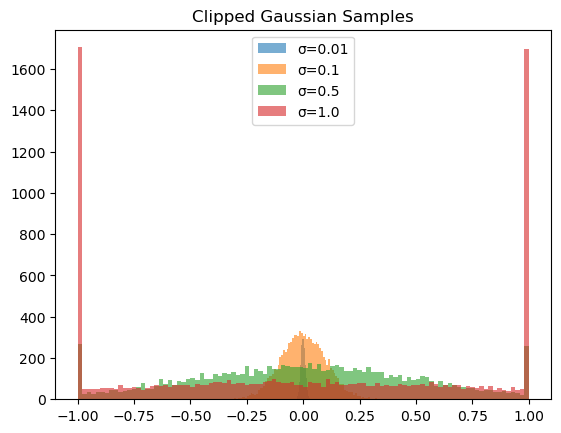

In [1]:
import matplotlib.pyplot as plt
import numpy as np

sigmas = [0.01, 0.1, 0.5, 1.0]
for s in sigmas:
    samples = np.random.normal(0, s, size=10000)
    plt.hist(np.clip(samples, -1, 1), bins=100, alpha=0.6, label=f"σ={s}")
plt.legend(); plt.title("Clipped Gaussian Samples"); plt.show()


## Evaluation of the results

In [1]:
import torch
import numpy as np
import random

# Monkey patch missing attributes for newer numpy versions
if not hasattr(np, "float_"):
    np.float_ = np.float64
    
if not hasattr(np, "int_"):
    np.int_ = np.int64

seed = 0

# seeds
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark     = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from unityagents import UnityEnvironment
from codebase.maddpg.maddpg_agent import MADDPGAgent

# ----- Load your environment -----
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")  # or your env path
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

num_agents = 2
action_size = 2
obs_size = 24

# ----- Load trained MADDPG agent with saved weights -----
agent = MADDPGAgent(
    num_agents=num_agents,
    obs_size=obs_size,
    action_size=action_size,
    actor_hidden=[128, 128],
    critic_hidden=[128, 128],
    actor_lr=1e-4,
    critic_lr=1e-4,
    device=device,  # or "cuda" if available
    noise_params={"sigma": 0.0},  # no noise,
    noise_type="gaussian"
)

# ----- Load weights -----
for i in range(num_agents):
    agent.agents[i].actor.load_state_dict(
        torch.load(f"weights/checkpoint_actor_agent_{i}_2600.pth", map_location=device, weights_only=True))
    agent.agents[i].actor.eval()

score_list = []

# ----- Run evaluation episodes -----
for i in range(1, 1000):  # Run 5 evaluation episodes
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    episode_scores = np.zeros(num_agents)
    step = 0
    
    while True:
        # ✅ Use your MADDPG agent's eval-mode act()
        actions, _ = agent.act(states, eval=True)
        actions = np.clip(np.array(actions), -1, 1)

        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done

        episode_scores += rewards        

        states = next_states
        step += 1

        if np.any(dones):
            break
    
    episode_score = np.max(episode_scores)  # ✅ per specification
    score_list.append(episode_score)
    
    ma100 = np.mean(score_list[-100:])
    
    if ma100 > 0.5:
        print(f"Environment solved in {i} episodes! Average score: {ma100:.3f}")
        break

    print(f"Episode {i} — Score: {episode_score:.3f}, MA100: {ma100:.3f}, Steps: {step}")

Found path: /home/oliver/project-showroom/projects/reinforcement-learning/collab-and-compet/Tennis_Linux/Tennis.x86_64
Mono path[0] = '/home/oliver/project-showroom/projects/reinforcement-learning/collab-and-compet/Tennis_Linux/Tennis_Data/Managed'
Mono config path = '/home/oliver/project-showroom/projects/reinforcement-learning/collab-and-compet/Tennis_Linux/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
	ScreenSelector.so
Logging to /home/oliver/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


[MADDPG] Hyperparameters:
  - num_agents: 2
  - obs_size: 24
  - action_size: 2
  - actor_hidden: [128, 128]
  - critic_hidden: [128, 128]
  - actor_lr: 0.0001
  - critic_lr: 0.0001
  - tau: 0.001
  - gamma: 0.99
  - device: cuda
  - use_action_noise: False
  - noise_type: gaussian
  - noise_params: {'sigma': 0.0}
  - seed: 0
[Agent 0] Hyperparameters:
  - actor_hidden: [128, 128]
  - critic_hidden: [128, 128]
  - actor_lr: 0.0001
  - critic_lr: 0.0001
  - tau: 0.001
  - gamma: 0.99
  - actor_use_layer_norm: True
  - critic_use_layer_norm: True
  - noise_type: gaussian
  - noise_params: {'sigma': 0.0}
  - seed: 0
  - device: cuda
  - debug: True
[GaussianNoise] mu=0.0, sigma=0.0, seed=0, size=2
[Agent 1] Hyperparameters:
  - actor_hidden: [128, 128]
  - critic_hidden: [128, 128]
  - actor_lr: 0.0001
  - critic_lr: 0.0001
  - tau: 0.001
  - gamma: 0.99
  - actor_use_layer_norm: True
  - critic_use_layer_norm: True
  - noise_type: gaussian
  - noise_params: {'sigma': 0.0}
  - seed: 1
  -

KeyboardInterrupt: 

## ✅ The Overall Code Respects the Cooperative Setting

### 1. **Agents are trained independently but not adversarially**

* Each agent’s `DDPGAgent.learn(...)` call updates only its own actor and critic.
* There is **no attempt to minimize the opponent’s reward** (which would happen in competitive training via negated rewards or zero-sum Q functions).
* The critic loss is based on:

  $$
  Q_i(o_1, o_2, a_1, a_2) \rightarrow \text{target} = r_i + \gamma Q'_i(o'_1, o'_2, a'_1, a'_2)
  $$

  which uses **only the reward of agent $i$** — not any form of relative score.

### 2. **Experience is shared through the Replay Buffer**

* A single `MultiAgentReplayBuffer` is used.
* Both agents store their transitions in the same structure — this enables **shared learning dynamics** even if the training is technically per-agent.
* Actions and observations are jointly stored, allowing critics to **observe coordination** effects.

### 3. **Decentralized Actors, Centralized Critics**

* During training, critics have access to the full state and action space:

  $$
  Q_i(o_1, o_2, a_1, a_2)
  $$

  This allows them to learn **joint-value estimates** — crucial for modeling inter-agent dynamics and helping agents learn to cooperate.
* During execution, actors use only their **local observation**:

  $$
  a_i = \mu_{\theta_i}(o_i)
  $$

  which respects the decentralized nature of the environment.

### 4. **Reward Handling**

* Each agent receives its **own reward** from the environment (`rewards[i]`).
* We **do not subtract** the other agent's reward or implement any competition.
* The training goal, implicitly, is:

  $$
  \text{maximize average/max score across both agents}
  $$

  — which aligns with the projects definition of solving the environment.

---

## Conclusion

Even though the architecture supports competitive training (e.g., centralized critics could be modified for zero-sum training), everything you’re doing right now:

* Optimizing each agent **independently** using **only its own reward**
* Enabling **joint context** via centralized critics
* Measuring performance via max agent score or average rally length

…is entirely appropriate for a **cooperative, coordination-based task** like Unity Tennis.


<details>
<summary>Training Dynamics</summary>


---

## 🎯 Part 1: What *Should* Happen (Ideal Dynamics)

### 🔁 Environment Setup Reminder:

* 2 agents cooperatively **bounce a ball over the net**
* Each agent gets **individual observations and rewards**
* A positive reward (+0.1) for successful hits
* A small penalty (−0.01) for letting the ball drop or go out
* Goal: learn to **rally the ball back and forth as long as possible**

---

### ✅ Ideal Training Dynamics Step-by-Step

#### 🔄 Phase 1: Warm-up (exploration)

* OU noise dominates → both agents try random actions
* Ball rarely crosses the net
* Short episodes, low reward
* Replay buffer fills with diverse (but mostly bad) experiences

#### 🔁 Phase 2: Early improvement

* Occasionally a random action **succeeds** in returning the ball
* Those rare **positive rewards** are captured
* The **critic learns** that certain states + actions yield nonzero Q
* Actors start **drifting toward those actions**

#### 🔄 Phase 3: Self-reinforcing cooperation

* Agents learn to **position and return** the ball more reliably
* Q-values rise → actor gradients stay alive
* Buffer fills with **cooperative transitions**
* Action outputs move away from saturation toward nuanced control
* Episode lengths grow
* Rewards per episode grow

#### 🔄 Phase 4: Stabilization

* OU noise has smaller effect (by clamping, or annealing if used)
* Actors fine-tune behavior
* Losses stabilize, Q-values converge
* Each agent adapts to the **other agent's behavior** (emergent coordination)

---

## 🧨 Part 2: What’s Going Wrong in Your Case

Your telemetry suggests the following **pathological divergence** instead.

### 🛑 Phase 1: Exploration (normal)

* Noise leads to random action
* Very short episodes, mostly failures
* Replay buffer gets filled → so far still fine

### ⚠️ Phase 2: Asymmetric early success

* **Agent\_1** hits the ball over once by luck → gets a +0.1
* **Agent\_0** fails → gets a -0.01
* Buffer now has a skew: more **positive examples** for agent\_1, negative for agent\_0

### 🧨 Phase 3: Divergence

* Agent\_1’s critic starts learning "returning the ball → good"
* Agent\_0's critic starts learning "bad things happen always"
* Agent\_0’s Q-values drop → gradients vanish → actor dies
* Agent\_0 saturates (e.g. constant -0.9 output), stops changing
* Now agent\_1 has **no partner** to rally with

### 🔁 Phase 4: Collapse

* Agent\_1 still explores briefly, but rallies are impossible
* Q-values for both agents fall again
* Reward per episode collapses
* All actors saturate → dead gradients
* Critic loss stays "alive", but learning stalls
* Policy stuck in local failure mode

---

## 🔬 Key Symptoms You Reported (Matching This Pattern)

| Signal                | Interpretation                             |
| --------------------- | ------------------------------------------ |
| Gradients dead        | 🚨 Actor collapsed, no learning signal     |
| Q-values flat/falling | ❌ Critic has nothing meaningful to predict |
| Action saturation     | ❌ Policy learned rigid extremes            |
| Reward mean falling   | Agents worsening → failure loop            |
| StateMean divergence  | One agent exploring, other stuck           |
| Reward std → 0        | No variability, no discovery               |

---

## ✅ What You Ideally Want to See

| Metric         | Ideal Signal                      |
| -------------- | --------------------------------- |
| Actor gradient | Fluctuating, non-zero             |
| Q-values       | Rising early, then stabilizing    |
| Actions        | Spanning mid-range values         |
| Reward mean    | Increasing trend                  |
| Reward std     | High early, reducing with mastery |
| State mean/std | Symmetrical across agents         |

---

## 🛠️ Final Summary

Your agents are:

* **Learning asymmetrically**
* **Failing to bootstrap cooperation**
* Getting trapped in a **local dead zone** where coordination never emerges



</details>